In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bs = pd.read_csv("day.csv")
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bs["dteday"] = pd.to_datetime(bs["dteday"])

In [6]:
bs["workingday"].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [7]:
bs.corr()["workingday"][["casual", "registered"]]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

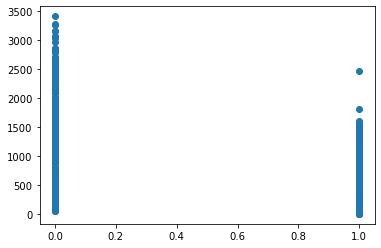

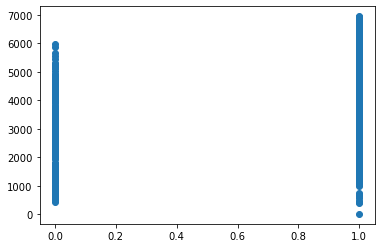

In [8]:
plt.scatter(bs["workingday"], bs["casual"])
plt.show()

plt.scatter(bs["workingday"], bs["registered"])
plt.show()

In [10]:
# plt.scatter(bs["workingday"], bs["casual"])
# plt.scatter(bs["workingday"], bs["registered"])
# plt.show()

In [ ]:
0   casual  regd   # mean
1   casual  regd

In [12]:
w = bs.groupby("workingday")[["casual", "registered"]].mean()
w

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


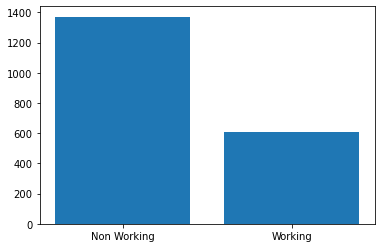

In [15]:
plt.bar(w.index, w["casual"])
plt.xticks([0,1], ["Non Working", "Working"])
plt.show()

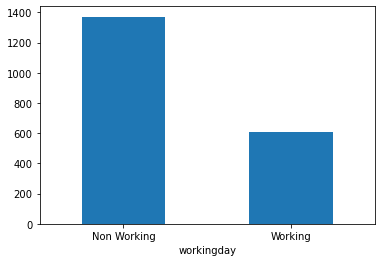

In [22]:
w["casual"].plot.bar()
plt.xticks([0,1], ["Non Working", "Working"], rotation = 0)
plt.show()

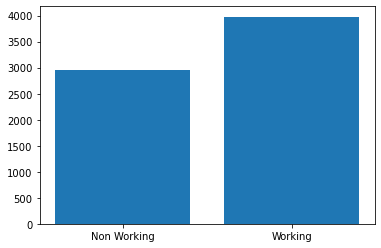

In [23]:
plt.bar(w.index, w["registered"])
plt.xticks([0,1], ["Non Working", "Working"])
plt.show()

In [26]:
pd.pivot_table(data = bs, index = "workingday", values = ["casual", "registered"],)

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


In [31]:
wd = pd.pivot_table(data = bs, index = "weekday", values = ["casual", "registered"])
wd

,casual,registered
weekday,,
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714


In [32]:
bs["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [36]:
bs.groupby("yr")["weathersit"].value_counts()

yr  weathersit
0   1             226
    2             124
    3              15
1   1             237
    2             123
    3               6
Name: weathersit, dtype: int64

In [37]:
bs.groupby("yr")["weathersit"].value_counts(normalize = True)

yr  weathersit
0   1             0.619178
    2             0.339726
    3             0.041096
1   1             0.647541
    2             0.336066
    3             0.016393
Name: weathersit, dtype: float64

We only see three unique values above, but, according to the documentation, the `weathersit` column has four unique values (`4` has a frequency of zero as a consequence):

-   `1`: clear or few clouds
-   `2`: mist or cloudy
-   `3`: light rain, light snow, thunderstorm
-   `4`: heavy rain, snow, ice pellets, fog

We call the number of times that a unique value occurs the **frequency**. And we call the output of `bike_sharing['weathersit'].value_counts()` a **frequency table**.

The best way to visualize a frequency table is by using a bar plot.

In [38]:
bs["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: cnt, Length: 696, dtype: int64

Bar plots work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.

Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram.

In [48]:
bs["cnt"].value_counts(bins = 10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

* The unique values are now number intervals. `(4368.0, 5237.2]` is a number interval.
* The `(` character indicates that the starting number is not included, 
* while the `]` indicates that the ending number is included. 
* The interval `(4368.0, 5237.2]` contains all numbers greater than 4368.0 and less than or equal to 5237.2.